In [12]:

import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd

In [13]:
# Enable the cache
ff1.Cache.enable_cache('cache') 

In [14]:
year = 2023
circuit = 'Qatar'
session = ff1.get_session(year, circuit, 'R')
session.load()

logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	Using cached data for season_schedule
logger      WARNING 	Failed to load schedule from F1 API backend!
core           INFO 	Loading data for Qatar Grand Prix - Race [v3.1.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...


In [ ]:
laps = session.laps

In [ ]:
driver_stints = laps[['Driver', 'Stint', 'Compound', 'LapNumber']].groupby(
    ['Driver', 'Stint', 'Compound']
).count().reset_index()

In [ ]:

driver_stints = driver_stints.rename(columns={'LapNumber': 'StintLength'})

driver_stints = driver_stints.sort_values(by=['Stint'])

In [ ]:
if int(year) >= 2019:
    compound_colors = {
      'SOFT': '#FF3333',
      'MEDIUM': '#FFF200',
      'HARD': '#EBEBEB',
      'INTERMEDIATE': '#39B54A',
      'WET': '#00AEEF',
    }
else:
    compound_colors = {
      'HYPERSOFT': '#FFC0CB',
      'ULTRASOFT': '#A020F0',
      'SUPERSOFT': '#FF3333',
      'SOFT': '#FFF200',
      'MEDIUM': '#EBEBEB',
      'HARD': '#ADD8E6',
      'SUPERHARD': '#FFA500',
      'INTERMEDIATE': '#39B54A',
      'WET': '#00AEEF',
    }

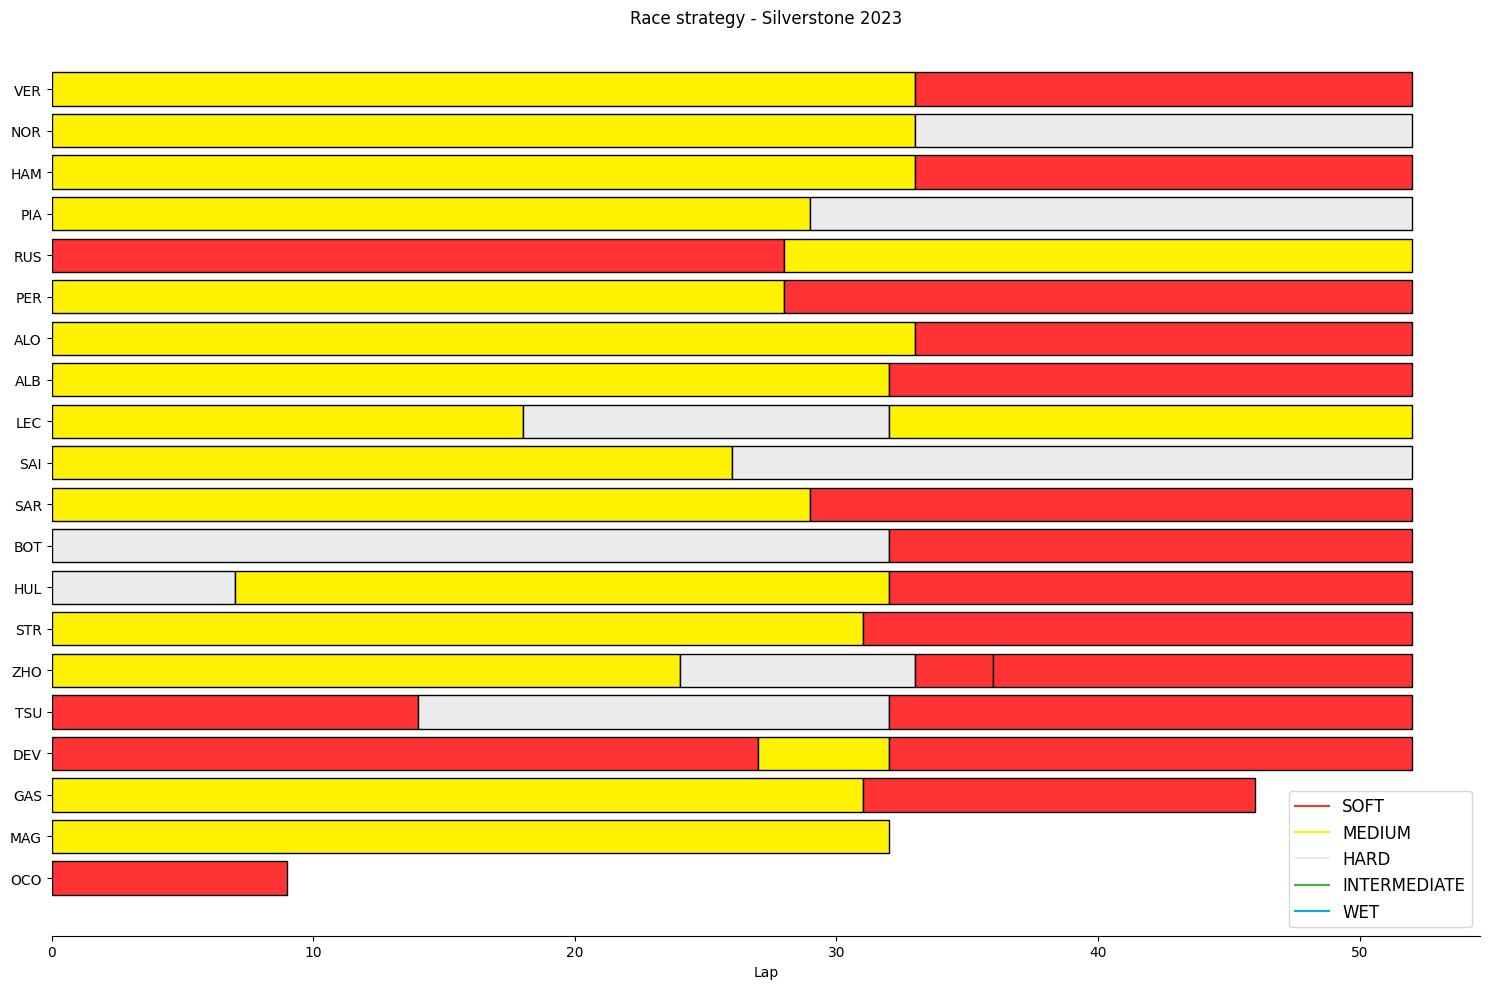

In [ ]:
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

for driver in session.results['Abbreviation']:
      stints = driver_stints.loc[driver_stints['Driver'] == driver]
      
      previous_stint_end = 0
      for _, stint in stints.iterrows():
          plt.barh(
              [driver], 
              stint['StintLength'], 
              left=previous_stint_end, 
              color=compound_colors[stint['Compound']], 
              edgecolor = "black"
          )
          
          previous_stint_end = previous_stint_end + stint['StintLength']
for compound, color in compound_colors.items():
    ax.plot([], [], color=color, label=compound)
ax.legend(fontsize='large', loc='lower right')  
  # Set title
plt.title(f'Race strategy - {circuit} {year}')
          
  # Set x-label
plt.xlabel('Lap')

  # Invert y-axis 
plt.gca().invert_yaxis()

  # Remove frame from plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.savefig('img/strategy.png', dpi=300)